# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Reinforcement%20Learning/Ads_CTR_Optimisation.csv

--2021-09-29 08:30:39--  https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Reinforcement%20Learning/Ads_CTR_Optimisation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200050 (195K) [text/plain]
Saving to: ‘Ads_CTR_Optimisation.csv’

Ads_CTR_Optimisatio 100%[===================>] 195.36K  --.-KB/s    in 0.004s  

2021-09-29 08:30:39 (47.9 MB/s) - ‘Ads_CTR_Optimisation.csv’ saved [200050/200050]



## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Thompson Sampling Algorithm
<img src="https://i.ibb.co/P6hV9v5/Thompson-Sampling-Slide.png" alt="Thompson-Sampling-Slide">

## Implementing Thompson Sampling

In [5]:
import random # yeah, for calculating the betavariate of beta distribution
N = 10000 # number of users
d = 10 # number of ads
ads_selected = []
numbers_of_rewards_0 = [0]*d # the number of times the ad i got reward 0 upto round d
numbers_of_rewards_1 = [0]*d  # the number of times the ad i got reward 1 upto round d
total_reward = 0
for n in range(N):
  max_random_beta = 0
  ad = 0
  for i in range(d):
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
    if random_beta>max_random_beta:
      max_random_beta = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward>0:
    numbers_of_rewards_1[ad]+=1
  else:
    numbers_of_rewards_0[ad]+=1
  total_reward+=reward


## Visualising the results - Histogram

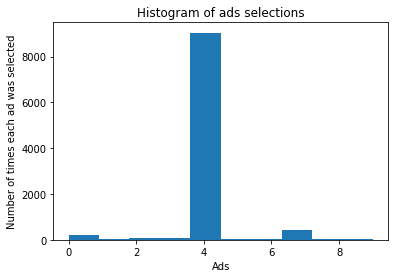

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()